# Looking for the Beauty Higgs decay!

<CENTER><img src="../../images/ATLASOD.gif" style="width:50%"></CENTER>

This notebook uses [ATLAS Open Data](https://opendata.atlas.cern) to show you the steps to search for the Higgs to two $b$ quarks decay.

ATLAS Open Data provides open access to proton-proton collision data at the LHC for educational purposes. ATLAS Open Data resources are ideal for high-school, undergraduate and postgraduate students.

Notebooks are web applications that allow you to create and share documents that can contain for example:
1. live code
2. visualisations
3. narrative text


### What is the Higgs boson? 
The Higgs boson is a fundamental particle predicted by the Standard Model. 
It is a manifestation of the Higgs field,
    which gives mass to the fundamental particles.
However,
    it is incredibly hard to produce.
At the LHC, 
    a Higgs particle is produced about once every 10 billion collisions!
This tiny fraction makes it very difficult to detect.
Nevertheless, 
    after years of data collection, 
    the Higgs boson was finally discovered in 2012 by CMS and ATLAS experiments at CERN.
In this tutorial, 
    we shall search for the Higgs as well. 


### Searching for the Higgs
This analysis loosely follows the paper on the [evidence of $H\to b\bar{b}$ decay by ATLAS](https://link.springer.com/article/10.1007/JHEP12%282017%29024). You can read more about this analysis in the Physics Briefing from 2017: [A first LHC sighting of the Higgs boson in its favourite decay](https://atlas.cern/updates/briefing/first-lhc-sighting-higgs-boson-its-favourite-decay).

The Higgs boson can be produced in many different ways. 
In particle physics, 
    we describe these production modes using Feynman diagrams.
These diagrams allow us to visualise particle processes while also acting as powerful tools for calculations.
See [here](https://cds.cern.ch/record/2759490/files/Feynman%20Diagrams%20-%20ATLAS%20Cheat%20Sheet.pdf) for more information on Feynman diagrams.

There are four main production modes of the Higgs boson, and their respective Feynman diagrams:
1. Gluon-gluon fusion (top left)
2. Vector boson fusion (top right)
3. Vector boson bremsstrahlung (bottom left)
4. Top-antitop fusion (bottom right)

<table>
        <tr>
            <td bgcolor="#ffffff"><img src="images/ImagesHiggs/ggH.png"></td>
            <td bgcolor="#ffffff"><img src="images/ImagesHiggs/VBFH.png"></td>
        </tr>
        <tr>
            <td bgcolor="#ffffff"><img src="images/ImagesHiggs/WH.png" ></td>
            <td bgcolor="#ffffff"><img src="images/ImagesHiggs/ttbarfusion.png" ></td>
        </tr>
    </table>

The Higgs has a very short lifetime,
    on the order of $10^{-22} \,\text{s}$.
It decays extremely quickly after production,
    so there is no hope of directly detecting the particle.
Nevertheless,
    we can use the Standard Model to predict its 
    decay products: photons, $Z$ bosons, quarks, etc.,
    all with different probabilities.
These **decay channels** can be used to identify the Higgs boson.
In this notebook, 
    we'll be looking at one particular decay channel:
$$H \rightarrow b\bar{b}$$

This decay channel actually accounts for almost $60\%$ of all Higgs decays. 
Ideally,
    we would search for collisions which yield two bottom quarks as products and this would tell us that a Higgs boson is present.
Despite this, 
    the Higgs was not discovered through this channel, 
    and this decay was only verified more recently in $2018$.
Why?
In fact, 
    this channel is one of the most difficult to detect at the LHC,
    precisely because proton-proton collisions tend to produce a huge number of $b$ quarks independently of the Higgs.
In addition to the decay signal,
    there are many other **background** processes that lead to two reconstructed $b$ quarks in the final state. 

To make the analysis easier, 
    we will focus on the vector boson bremsstrahlung production channel, 
    in which a $W$ or $Z$ bozon is also created.
Because the leptonic decays of the $W$ and $Z$ have very clear signatures,
    these processes will help us identify the case where the Higgs is produced.
There are three main decay channels for $H\to b\bar{b}$:
1. $0$-lepton products: $Z + H\to \nu\bar{\nu} + b\bar{b}$
2. $1$-lepton products: $W + H\to l\nu  + b\bar{b}$
3. $2$-lepton products: $Z + H\to l\bar{l} + b\bar{b}$

We will focus on the $0$-lepton channel.
This is referred to as our desired **signal**.
In this channel, 
    there are no charged leptons produced, 
    only neutrinos and bottom quarks.
Nevertheless,
    after narrowing our analysis,
    we still have to deal with a lot of background processes.

Wait a second, 
    it turns out that the ATLAS detector cannot detect neutrinos!
How then do we verify our $0$-lepton channel?
Actually, 
    using a physical principle known as conservation of momentum,
    we can indirectly detect the presence of neutrinos.
Since the proton beams in the LHC are travelling axially, 
    the momentum in the transverse/radial direction must sum to zero before and after the collision event.
When a neutrino is created and not directly detected,
    there is some missing transverse energy $E^\text{miss}_T$ that can be calculated from the other decay products.
This missing transverse energy can then be used in calculations which verify the Higgs decay.

One of the main sources of background is that of $V+$ jets processes (V being either a W- or a Z-boson), 
    where leptons produced can either be lost or misidentified as jets.

We also have background contributions from diboson processs $ZZ\to \nu\bar{\nu} + b\bar{b}$ and top-antitop processes. 


For these backgrounds,
    we will attempt to distinguish them from the Higgs decay using various selection rules.
These selection rules place restrictions on the physical variables in the data,
    such as the relationships between the jet and neutrino angles, 
    or the minimum $E^\text{miss}_T$.
Thus, 
    we can cut away all data with products that do not have these properties.
These selections increase the ratio of our signal to the background.

We can further discern the signal by accounting for the total invariant mass of the two bottom quark products. 
We know through conservation of energy and momentum that the invariant mass of the products must be equal to the Higgs mass, 
    while other background processes will have different invariant masses. 
Our last step would be to plot the invariant mass of each event and spot the peak in mass around $125\, \text{GeV}$,
    which corresponds to the mass of the Higgs boson. 

By the end of this notebook you will be able to:
1. Learn to process large data sets using selections
2. Understand some general principles of a particle physics analysis
3. Search for the Higgs boson!

See [here](https://opendata.atlas.cern/docs/data/for_research/metadata) for more information on signals and backgrounds!

## A challenging channel

As was mentioned earlier the searches for Higgs decaying into $b\bar{b}$ is very challenging at the LHC due to the large backgrounds of b-jets coming from other interactions happening in the proton-proton collision. In fact, pairs of b-quarks from other processes than the decay of the Higgs are created 10 million times more frequently than a $H \to b\bar{b}$ decay. It is therefore crucial for to be able to surpress as much of this background as possible. This is the main motivation for looking at Higgs bosons produced in assosciation with either a W- or a Z-boson. Nevertheless, given the complexity of the published $H \to b\bar{b}$ analysis there are some shortcomings of the analysis when carried out using the OpenData which will lead to somewhat poorer results. Some of these issues are listed below. Maybe, after going through this notebook, you will be able to improve on some of these? 

 * Jets with $|\eta|>2.5$ are not inculded in the ATLAS OpenData (will be in the next release, though) 
 * The *muon-in-jet* correction can not be applied (see page 8 of publication)
 * There are no scale factors for the MET triggers in ATLAS OpenData (estimated to be within 5% (see Section 4.2.1 on page 10 ))
 * A greatly simplified *PtReco* correction to the energy of (all) jets (see page 8 of publication)
     * Applied in this notebook is a linearly decreasing correction assuming 12% correction for jets with $p_T = 20~$GeV and 1% for jets with $p_T \geq 100~$GeV. As illustrated in the plot below. 

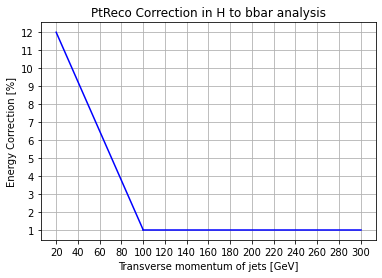

In [1]:
import numpy as np # for numerical calculations such as histogramming
import matplotlib.pyplot as plt # for plotting
fig, ax = plt.subplots()
x = np.linspace(20, 100, 80)
y = ((-11./80.)*x+14.76)
x2 = np.linspace(100, 300, 200)
y2 = np.ones(200)
plt.plot(x,y,c="blue")
plt.locator_params(axis='both', nbins=20)
plt.grid(True)
plt.plot(x2,y2,c="blue")
ax.set_title("PtReco Correction in H to bbar analysis")
ax.set_xlabel(r'Transverse momentum of jets [GeV]')
ax.set_ylabel("Energy Correction [%]");

### Running a Python notebook
A Python notebook consists of cell blocks, 
    each containing lines of Python code.
Each cell can be run independently of each other,
    yielding respective outputs below the cells.
Conventionally,
    cells are run in order from top to bottom.


- To run the whole notebook, in the top menu click Cell $\to$ Run All.

- To propagate a change you've made to a piece of code, click Cell $\to$ Run All Below.

- You can also run a single code cell, by clicking Cell $\to$ Run Cells, or using the keyboard shortcut Shift+Enter.

For more information, 
    refer to [here](https://www.codecademy.com/article/how-to-use-jupyter-notebooks).

## ATLAS Open Data Initialisation

### First time package installation on your computer (not needed on mybinder)
This first cell installs the required python packages.
It only needs to be run the first time you open this notebook on your computer. 
If you close Jupyter and re-open on the same computer, you won't need to run this first cell again.
If this is opened on mybinder, you don't need to run this cell.

We will use the [atlasopenmagic](https://opendata.atlas.cern/docs/data/atlasopenmagic) to install all the required packages. We will later use this package to retrieve the Open Data datasets. 

In [ ]:
#install required packages
import sys
!pip install atlasopenmagic
from atlasopenmagic import install_from_environment
install_from_environment()

### To setup everytime
We're going to import a number of packages to help us:
* `numpy`: provides numerical calculations such as histogramming
* `matplotlib`: common tool for making plots, figures, images, visualisations
* `uproot`: processes `.root` files typically used in particle physics into data formats used in python
* `awkward`: introduces `awkward` arrays, a format that generalizes `numpy` to nested data with possibly variable length lists
* `vector`: to allow vectorized 4-momentum calculations

In [3]:
import matplotlib_inline # to edit the inline plot format
#matplotlib_inline.backend_inline.set_matplotlib_formats('pdf', 'svg') # to make plots in pdf (vector) format
from matplotlib.ticker import AutoMinorLocator # for minor ticks
import uproot # for reading .root files
import awkward as ak # to represent nested data in columnar format
import vector # for 4-momentum calculations
import time

Unit definitions, as stored in the data files

In [4]:
MeV = 0.001
GeV = 1.0

## Example 1: Reading data 

We will use the [atlasopenmagic](https://opendata.atlas.cern/docs/data/atlasopenmagic) to access the open data directly from the ATLAS OpenData Portal so no need to download any samples. First we import the module and load the Open Data release.

In [ ]:
import atlasopenmagic as atom
atom.available_releases()
atom.set_release('2025e-13tev-beta')

In [6]:
# Select the skim to use for the analysis
skim = "2bjets"

For convenient naming and identification purposes,
    we define a dictionary which stores all the important names of the samples we want to pull from the directory.

In [7]:
defs = {
    r'Data':{'dids':['data']},
    r'Background $t\bar{t}$':     {'dids': [410470,410471],'color': "yellow" },
    r'Signal':  {'dids': [345056, 345058, 345949, 346311, 346312],'color': "red" },
    'Background Single top': {'dids': [410644,410645,410658,410659,601624,601628],'color':'orange'},
    r'Background $V+$jets' : {'dids': [700320, 700321, 700322, 700323, 700324, 700325, 700335, 700336,
                                       700337, 700338, 700339, 700340, 700341, 700342, 700343, 700344, 700345,
                                       700346, 700347, 700348, 700349, 700467, 700468, 700469, 700470,
                                       700471, 700472, 700792, 700793, 700794],'color':'blue'},
    'Background Diboson': {'dids': [700488,700489,700490,700491,700492,
                                    700493,700494,700495,700496,700195,
                                    700196,700199,700200,700201],'color':'grey'}
}

samples   = atom.build_dataset(defs, skim=skim, protocol='root', cache=True)

The key named `Data` refers to the event information collected from real experiments,
    while the `Background` and `Signal` keys refer to Monte-Carlo (MC) simulations of the ATLAS experiments.
Both real data and MC data will then be analysed and compared together to discover the Higgs! 

Let's try accessing `data_15` in the Open Data URL as an example.

In [ ]:
# We shall use the first entry in 'list', 'data15_periodD.2bjets70.root'
value = samples['Data']['list'][0]
print(f"{value=}")

# This is now appended to our file path to retrieve the data_15 file
data_15_path = value 

Next, we shall try opening the `data15_periodD` file to see what is inside.
In the file (called a `tree`),
    there are many entries, 
    one for each event.
In each event,
    a dictionary stores the all relevant information as keys, such as the event number (`eventNumber`), lepton transverse momentum (`lep_pt`), etc.  
Details on the variables in the dictionary can be viewed [here](https://opendata.atlas.cern/docs/data/for_education/13TeV25_details#variable-list).

More information on trees can be viewed [here](https://masonproffitt.github.io/uproot-tutorial/03-trees/index.html).

In [ ]:
# Accessing the file from the online directory (":mini" opens the tree in a desired manner)
tree = []
tree = uproot.open(data_15_path + ":analysis")

# There are 39 entries in the tree
print(tree.num_entries)

# We can view all the information stored in the tree using the .keys() method.
tree.keys()

Perhaps we'd like to see the jet energies. 
We can access this from our tree using the key `jet_e`. 
Also, 
    from this point on we shall be manipulating our tree arrays using the `awkward` library.
We can use `library="ak"` in the argument of the `.arrays()` method to use this library.
If you ever see `library="ak"` in the code,
    it means that the array is output as an `awkward` array.

In our analysis, 
    not all the information in the tree is important.
We can store the important variables in a list and retrieve them from the tree later on.
As it turns out, 
    we will need the following set of variables:

In [10]:
# Define what variables are important to our analysis
variables = ['jet_jvt','jet_n', 'jet_pt', 'jet_eta', 'jet_phi', 'jet_e', 'met', 'met_phi', 'trigMET', 'jet_btag_quantile','lep_isLooseIso', 'lep_d0sig', 'lep_z0', 'lep_type', 'lep_eta', 'lep_e', 'lep_pt', 'lep_isTightID', 'lep_isLooseID']

Now that we understand how to access the information in the `data15_periodD` tree,
    we can begin analysis.
As mentioned in the introduction,
    there are two steps to be completed for each event entry: **selections** and **mass calculation**.

### Selections 
Our goal is to isolate the signal from our background. 
To do this, 
    we must introduce various filters and selections on the data that preserve the signal while cutting away the background. 
In its current state, 
    the data contains many unwanted detections and false positives. 
There are many reasons for this. 
For one, 
    it is possible to misidentify leptons as jets.
Some of our selections will aim to cut away such misidentifications based on the properties of the jets. 

These are the selections that we want to make on the data:

**MET:** Passes the online missing transverse energy (MET) trigger. 
Also, offline we require  $E^\text{miss}_T>150 \,\text{GeV}$ .

- For more information on triggers, refer to [here](https://cds.cern.ch/record/2775198/files/Trigger%20and%20Data%20Acquisition.pdf)

**Lepton cuts:** Events must not contain any loose leptons.
 - A set of cuts that determine the level of efficiency of a lepton identification algorithm
 - Looseness and tightness of lepton detections define a strictness criteria for whether a lepton was truly detected.
 - In the selection, 
    loose leptons are defined via the inverse of the tightness ID, 
    and also have $E_T > 25 \, \text{GeV}.$

**Jet cuts:** Exactly two or three jets. All jets must have $p_T > 20 \, \text{GeV}$ and $|η| < 2.5$.

- Since the Higgs decays to two $b$ quarks, 
    we expect at least two jets in the desired signal.
We shall restrict our selection up to three jets, 
    rejecting events with four or more jets. 
This will reduce the large background arising from $t\bar{t}$ production.
- We restrict the value of $\eta$ because this is the accessible range of the inner detector which we use for $b$-tagging.

**$b$-tagging:** Exactly two $b$-tagged jets. For the $b$-tagged jet with highest $p_T$, we require $p_T > 45 \, \text{GeV}$.

- A $b$-tagged jet is simply a jet that has been identified to be originating from a $b$ quark. 
Because there are two $b$ quarks in the Higgs decay, 
    we demand only events with two of such jets.
In practice, 
    a jet will be $b$-tagged if its $b$-tag quantile is equal to $2$.
- We also place a lower bound cut on the $p_T$ of the leading $b$ quark, 
    as this will significantly reduce the contribution of background processes,
    increasing the significance of the Higgs signal.

**Sum of jet $p_T$:** $H_T > 120 \, \text{GeV} $

 - This selection is used to remove a marginal region of phase space in which the trigger efficiency exhibits a small dependence on the jet multiplicity.

**Angular selections:** Require $\Delta\phi$ between two $b$-tagged jets  $<140^\circ$, 
    $\Delta\phi$ between $E_T^\text{miss}$ and sum of $b$-tagged jets $>120^\circ$, 
    and minimum $\Delta\phi$ between $E_T^\text{miss}$ and various jets must be $>20^\circ$ for two-jet events and $>30^\circ$ for three-jet events.

 - These angular selection criteria are applied in order to suppress multi-jet background.
These backgrounds mostly consist of jets mismeasured in the calorimeters.

Let's try to perform some of these calculations for a set of example events.

In [11]:
example_events = ak.Array({'jet_n':[2,2,3,0],
                      'jet_pt':[[21,21],[110,15],[70,30,30],[]], 
                      'jet_phi':[[2, 3], [-2, -2], [-11, 222, 300], []],
                      'jet_eta':[[-1,1],[-3,1],[-1,-1,0],[]], 
                      'jet_e':[[-1,1],[-3,1],[-1,-1,0],[]], 
                      'jet_btag_quantile':[[4,4], [4, 4], [4, 4, 4],[]],
                      'met_phi': [40,20,20,40],
                      'met': [40,20,20,160],
                      'trigMET': [True, True, True, True]})

In [12]:
# This block is currently unused, but would be useful if one would prefer to run the examples on
# data_15 instead of an example array
tree = uproot.open(data_15_path + ":analysis")

# Using tree.iterate, we can load the variables that we want and ignore the rest, saving resources
for data in tree.iterate(variables,
                            library="ak",
                            entry_stop=tree.num_entries): # process up to numevents*fraction
    data_jet = data

To perform $b$-tagging, 
    let us create a $b$-tag ID for each jet.

In [13]:
example_events['btag_ID'] = (example_events['jet_btag_quantile'] >= 4)

Now, 
    we check that there are only two $b$-tagged jets,
    as mentioned in our selection rules. 

In [14]:
btag_jets_n = ak.sum(example_events['btag_ID'], 1)
select_exactly_2_b = btag_jets_n == 2
select_exactly_2_b

<Array [True, True, False, False] type='4 * bool'>

We see that the first two jets have exactly two $b$-tagged,
    while the last two fail this requirement.
We can also do other selections.

In [15]:
# Apply MET trigger
MET_trigger = example_events['trigMET'] 
print(f'Passes MET trigger? {MET_trigger}')

# Apply MET > 150 GeV
missing_ET = example_events['met'] 
missing_ET_bool = missing_ET > 150 * GeV
print(f'Passes MET cut? {missing_ET_bool}')

Passes MET trigger? [True, True, True, True]
Passes MET cut? [False, False, False, True]


All our events pass the MET trigger, 
    but only the last event passes the MET cut.

The other selections have been written below as functions. 
You may test these selection functions on the `example_events` from above,
    or define your own examples to see how they work.

In [16]:
def selectJets(data):
    # Count jets above pT threshold
    jet_pt = data['jet_pt']
    jet_eta = abs(data['jet_eta'])
    jet_jvt = data['jet_jvt']
    
    cjet = ((jet_jvt == 1) & (data['jet_pt'] > 20 * GeV) & (abs(data['jet_eta']) < 2.5))
    fjet = ((jet_jvt == 1) & (data['jet_pt'] > 30 * GeV) & (abs(data['jet_eta']) >= 2.5) & (abs(data['jet_eta']) < 4.5))
    bjet = ((cjet) & (data['btag_ID']))
    bjet45 = ((cjet) & (data['btag_ID']) & (data['jet_pt'] > 45 * GeV))
    
    njet = ((ak.sum(((cjet) | (fjet)), 1) == 2) | (ak.sum(((cjet) | (fjet)), 1) == 3))
    
    nbjet = ak.sum(bjet,1) == 2 
    nbjet45 = ak.sum(bjet45,1) == 1 
    
    return (njet & nbjet & nbjet45)

def selectZeroLeptons(data):
    lep_pt = data['lep_pt']
    lep_eta = abs(data['lep_eta'])
    lep_type = data['lep_type']
    lep_d0sig = data['lep_d0sig']
    lep_z0 = data['lep_z0']
    lep_iso = data['lep_isLooseIso']
    
    select_electrons = ((lep_type==11) & (lep_pt > 7 * GeV) & (lep_eta < 2.47) & (lep_d0sig < 5) & (lep_z0 < 0.5) & (lep_iso == 1) & (data['lep_isLooseID'] == 1))
    select_muons = ((lep_type==13) & (lep_pt > 7 * GeV) & (lep_eta < 2.7) & (lep_d0sig < 3) & (lep_z0 < 0.5) & (lep_iso == 1) & (data['lep_isLooseID'] == 1))
    
    nel = ak.sum(select_electrons,1)
    nmu = ak.sum(select_muons,1)
    nlep = nel + nmu

    return ((nel == 0) & (nmu == 0))


In [17]:
def select_HT(data):
    # HT (sum of jet pt) must be more than 120 GeV
    jet_pt = data['jet_pt']
    jet_eta = abs(data['jet_eta'])
    jet_jvt = data['jet_jvt']
    
    cjet = ((jet_jvt == 1) & (data['jet_pt'] > 20 * GeV) & (abs(data['jet_eta']) < 2.5))
    fjet = ((jet_jvt == 1) & (data['jet_pt'] > 30 * GeV) & (abs(data['jet_eta']) >= 2.5) & (abs(data['jet_eta']) < 4.5))
    
    njet = ak.sum(((cjet) | (fjet)), 1)
    
    HT = ak.sum(data['jet_pt'][((cjet) | (fjet))], 1)
 
    # Old jet n
    #select_HT = (((HT > 120 * GeV) * (data['jet_n'] == 2)) | ((HT > 150 * GeV) * (data['jet_n'] > 2)))
    select_HT = (((HT > 120 * GeV) * (njet == 2)) | ((HT > 150 * GeV) * (njet > 2)))
    
    return select_HT

def select_2b_phi(data):
    # azimuthal angle between two btagged jets less than 140 degrees
    # data['btag_ID'] = (data['jet_btag_quantile'] == 2)
    jet_jvt = data['jet_jvt']
    
    cjet = ((jet_jvt == 1) & (data['jet_pt'] > 20 * GeV) & (abs(data['jet_eta']) < 2.5))
    fjet = ((jet_jvt == 1) & (data['jet_pt'] > 30 * GeV) & (abs(data['jet_eta']) >= 2.5) & (abs(data['jet_eta']) < 4.5))
    bjet = ((cjet) & (data['btag_ID']))
    
    btag_jet_phi = data['jet_phi'][bjet]
    padded_array = ak.pad_none(btag_jet_phi, 2)
    differences = abs(padded_array[:,0] - padded_array[:,1])
    select_2b_phi = differences < (140 * np.pi/180)
    # select_2b_phi = ak.fill_none(select_2b_phi, False) 
    return select_2b_phi

def select_metbb_phi(data):
    # azimuthal angle between met and sum of btagged jets more than 120 degrees
    jet_jvt = data['jet_jvt']
    
    cjet = ((jet_jvt == 1) & (data['jet_pt'] > 20 * GeV) & (abs(data['jet_eta']) < 2.5))
    fjet = ((jet_jvt == 1) & (data['jet_pt'] > 30 * GeV) & (abs(data['jet_eta']) >= 2.5) & (abs(data['jet_eta']) < 4.5))
    bjet = ((cjet) & (data['btag_ID']))
    
    
    btag_jet_pt = data['jet_pt'][bjet]
    btag_jet_eta = data['jet_eta'][bjet]
    btag_jet_phi = data['jet_phi'][bjet]
    btag_jet_e = data['jet_e'][bjet]

    padded_pt = ak.pad_none(btag_jet_pt, 2)
    padded_eta = ak.pad_none(btag_jet_eta, 2)
    padded_phi = ak.pad_none(btag_jet_phi, 2)
    padded_e = ak.pad_none(btag_jet_e, 2)

    p = vector.zip({"pt": padded_pt, "eta": padded_eta, "phi": padded_phi, "E": padded_e})
    bb_jet_phi = (p[:,0]+p[:,1]).phi

    met_phi = data['met_phi']

    difference = abs(met_phi-bb_jet_phi)
    select_metbb_phi = difference > (120 * np.pi/180)

    return select_metbb_phi

def select_min_metjets_phi(data):
    # Minimum of azimuthal angle between met and jets more than 20 degrees for 2 jets, 
                                                              # 30 degrees for 3 jets
    jet_jvt = data['jet_jvt']
    met_phi = data['met_phi']
    
    cjet = ((jet_jvt == 1) & (data['jet_pt'] > 20 * GeV) & (abs(data['jet_eta']) < 2.5))
    fjet = ((jet_jvt == 1) & (data['jet_pt'] > 30 * GeV) & (abs(data['jet_eta']) >= 2.5) & (abs(data['jet_eta']) < 4.5))
    
    njet = ak.sum(((cjet) | (fjet)), 1)
    
    jet_phi = data['jet_phi'][((cjet) | (fjet))]

    differences = abs(jet_phi - met_phi)
    minimum = ak.min(differences, 1)
    #select_min_metjets_phi = (((minimum > 20 *np.pi/180) * (data['jet_n'] ==2)) | ((minimum > 30 *np.pi/180) * (data['jet_n'] > 2)))
    select_min_metjets_phi = (((minimum > 20 *np.pi/180) * (njet ==2)) | ((minimum > 30 *np.pi/180) * (njet > 2)))
    
    return select_min_metjets_phi

Next, we shall do the mass calculation. 

### Mass calculation
The data to be plotted is the total invariant mass of the two bottom quarks ($b$-tagged jets), which can be found using the equation: $$m_\text{bb} = \sqrt{E^2_\text{tot}-\mathbf{p}_\text{tot}\cdot\mathbf{p}_\text{tot}}$$
in units where $c=1$.
$E_\text{tot}$ is the total energy and $\mathbf{p}_\text{tot}$ is the total momentum.
This calculation is performed using the vector array method `.M` on the sum of jet 4-momenta (`jet_pt`,`jet_eta`,`jet_phi`,`jet_e`).
We can see this in the following function.

In [18]:
# Calculate invariant mass of the two b-tagged jets
# [:, i] selects the i-th  in each event
vector.register_awkward()
def calc_mass(data):
    # Count jets above pT threshold
    bjet = data['btag_ID']
    btag_jet_pt = data['jet_pt'][bjet]
    btag_jet_eta = data['jet_eta'][bjet]
    btag_jet_phi = data['jet_phi'][bjet]
    
    
    correct = (data['jet_pt'][bjet]<100)
    abhundred = (data['jet_pt'][bjet]>=100)
    
    # For jets without a matching lepton, the PtReco correction increases 
    # the energy of jets with pT ∼ 20 GeV by 12% and the energy of those
    # with pT > 100 GeV by 1%, while a larger correction is observed 
    # for jets matched to a lepton, due to the missing neutrino energy.
    btag_jet_e = ((data['jet_e'][bjet]*((1+((((-11./80.)*data['jet_pt'][bjet]+14.76))/100.)) ))*correct + data['jet_e'][bjet]*1.01*abhundred) 
    p = ak.zip({"pt": btag_jet_pt, "eta": btag_jet_eta, "phi": btag_jet_phi, "E": btag_jet_e}, with_name="Momentum4D")
    invariant_mass = (p[:, 0] + p[:, 1]).M # .M calculates the invariant mass
    return invariant_mass

In [19]:
# Performing the calculation for the first two events (with 2 b-tagged jets)
calc_mass(example_events[0:2])

<Array [-36.9, -1.09e+03] type='2 * float64'>

You may verify on your own that these functions give the same outputs as the previous code block.
Now, 
    we shall apply these functions over the entire `data15_periodD` tree using a `for` loop.

In [20]:
# Define empty list to hold all data for this sample
sample_data = []

# Perform the cuts for each data entry in the tree
for data in tree.iterate(variables, library="ak"): # the data will be in the form of an awkward array

    # Event Selection (reference: https://arxiv.org/pdf/1409.6212)

    # Generate btag identifier
    data['btag_ID'] = (data['jet_btag_quantile'] >= 4)

    data = data[data['trigMET']] # Apply MET trigger 
    data = data[data['met'] > 30 * GeV] # MET>30 GeV 
    
    data = data[selectJets(data)]
    data = data[selectZeroLeptons(data)]
    
    data = data[select_HT(data)]
    data = data[select_2b_phi(data)]
    data = data[select_metbb_phi(data)]
    data = data[select_min_metjets_phi(data)]

    # Invariant Mass
    data['mass'] = calc_mass(data)

    # Append data to the whole sample data list
    sample_data.append(data)

# turns sample_data back into an awkward array
data_15 = ak.concatenate(sample_data)

We can now plot the data using Matplotlib. 
The data will be turned into a histogram,
    with bins of width $5 \,\text{GeV}$.
Note that much of the code written here is meant for the aesthetics of the plot.

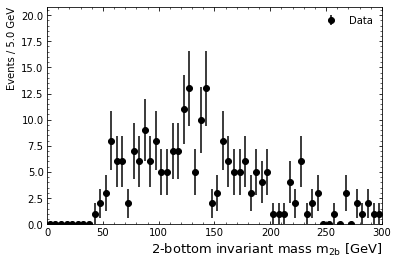

In [21]:
# x-axis range of the plot
xmin = 0 * GeV
xmax = 300 * GeV

# Histogram bin setup
step_size = 5 * GeV
bin_edges = np.arange(start=xmin, # The interval includes this value
                    stop=xmax+step_size, # The interval doesn't include this value
                    step=step_size ) # Spacing between values
bin_centres = np.arange(start=xmin+step_size/2, # The interval includes this value
                        stop=xmax+step_size/2, # The interval doesn't include this value
                        step=step_size ) # Spacing between values

# Creating histogram from data
data_x,_ = np.histogram(ak.to_numpy(data_15['mass']), 
                        bins=bin_edges ) # histogram the data
data_x_errors = np.sqrt( data_x ) # statistical error on the data

# *************
# Main plot 
# *************
main_axes = plt.gca() # get current axes

# plot the data points
main_axes.errorbar(x=bin_centres, y=data_x, yerr=data_x_errors,
                    fmt='ko', # 'k' means black and 'o' is for circles 
                    label='Data') 

# set the x-limit of the main axes
main_axes.set_xlim( left=xmin, right=xmax ) 

# separation of x axis minor ticks
main_axes.xaxis.set_minor_locator( AutoMinorLocator() ) 

# set the axis tick parameters for the main axes
main_axes.tick_params(which='both', # ticks on both x and y axes
                        direction='in', # Put ticks inside and outside the axes
                        top=True, # draw ticks on the top axis
                        right=True ) # draw ticks on right axis

# x-axis label
main_axes.set_xlabel(r'$2$-bottom invariant mass $\mathrm{m_{2b}}$ [GeV]',
                    fontsize=13, x=1, horizontalalignment='right' )

# write y-axis label for main axes
main_axes.set_ylabel('Events / '+str(step_size)+' GeV',
                        y=1, horizontalalignment='right') 

# set y-axis limits for main axes
main_axes.set_ylim( bottom=0, top=np.amax(data_x)*1.6 )

# add minor ticks on y-axis for main axes
main_axes.yaxis.set_minor_locator( AutoMinorLocator() ) 

# draw the legend
main_axes.legend( frameon=False ); # no box around the legend

Great,
    we managed to plot `data15_periodD`! 
Now, 
    we have not discussed how to deal with the Monte-Carlo simulation data,
    or even what they are for. 
Let us explain.

## Example 2: Reading Monte-Carlo data


Using the Standard Model, 
    we can do a set of randomised simulations to produce a set of theoretical data points to compare to our ATLAS data.
These are known as Monte-Carlo(MC) simulations.
There is one important change to be made to the MC data before we can compare them with our ATLAS data:
 - **Weights** - The MC data was computed in ideal circumstances. The real ATLAS detector has some inefficiencies, which we can account for by attributing the appropriate weight to each data point.The weight of a data point affects how it contributes to the histogram count for its bin.

Let's open an MC file.

In [ ]:
# We open an MC data file with sample value "taunugammagamma" using samples and infofile for reference of filenames
print(samples['Background Diboson'])
value = samples['Background Diboson']["list"][0]

# This is now appended to our file path to retrieve the root file
background_diboson = value

# Accessing the file from the online directory
tree = uproot.open(background_diboson + ":analysis")

Weights are important to our analysis. We will use:
- `xsec` - cross section 
- `mcWeight` - specific Monte-Carlo weight associated with each event
- `scaleFactor_PILEUP` - scale factor for pileup reweighting
- `scaleFactor_BTAG` - scale factor for b-tagging
- `filteff`- filter efficiency of MC generator
- `kfac` - multiplicative correction factor used to account for higher-order effects in theoretical calculations

Scale factors are generally related to estimates of the efficiencies and resolutions of detectors.

In [ ]:
weight_variables = ['xsec', 'mcWeight', 'ScaleFactor_PILEUP', 'ScaleFactor_FTAG', 'ScaleFactor_JVT', 'filteff', 'kfac', 'sum_of_weights']

# For example, see below for the weights corresponding to b-tagging
tree["ScaleFactor_FTAG"].arrays(library = "ak")

There is one more important variable,
    which is the integrated luminosity `lumi`,
    also written as $\int L \text{d}t$.
When `lumi` is multiplied by the cross section `xsec`,
    it gives a measure of the total number of events during a period of data taking.
For `data_15`,
    `lumi` has a value of $3.2 \,\text{fb}^{-1}$.
For more on cross sections and luminosities, 
    [see this cheatsheet](https://cds.cern.ch/record/2800578/files/Cross%20Section%20and%20Luminosity%20Physics%20Cheat%20Sheet.pdf).

To calculate the total weight of a Monte-Carlo event, 
    we use the following definition:
$$ w_\text{total} = \frac{\int L \text{d}t ~ \times \sigma \times w_\text{event} \times \text{scale-factors} \times \text{filter-efficiency} \times \text{k-factor}  }{ \sum_i w_i } $$
We can see that the weights are normalised by dividing through by $\sum_i w_i$, 
    the sum of weights `sumw`.

Now,
    with all the weights we've defined, 
    we will define a function that calculates a total weight for an event,
    which is the collective product of all the weights.

In [24]:
lumi = 36.1 # fb-1 for data_15 only

def calc_weight(events):
    return (
        ((lumi*1000. #*1000 to go from fb-1 to pb-1
        * events['xsec'] 
        * events['mcWeight']
        * events['ScaleFactor_PILEUP']
        * events['ScaleFactor_FTAG']
        * events['ScaleFactor_JVT']
        * events['filteff']
        * events['kfac'])
        / (events['sum_of_weights']))
        #* events.scaleFactor_LepTRIGGER
    )

#sumweights = metadata.loc[metadata.dataset_number == int(value.split('.')[0]), 'sumOfWeights'].values[0]

# Let's use the first event of our tree
# event = tree.arrays()[0] # This line takes very long, iterate is much faster
for data in tree.iterate(weight_variables, library = 'ak'):
    event = data[0]
    break
print(f"{calc_weight(event) = :.4f}")

calc_weight(event) = 0.1687


This calculation means that in our final histogram, 
    this event will be represented with ~$0.1687$ of a single count in the bin.
Now, we can apply the cuts as before to plot the MC data.
The code is the same as before,
    but we make sure to add in `weight_variables` to our `tree.iterate()`,
    and we store the weights in each event using a new dictionary key.

In [25]:
# Define empty list to hold all data for this sample
sample_data = []
# Perform the cuts for each data entry in the tree
for data in tree.iterate(variables + weight_variables, library="ak"): # the data will be in the form of an awkward array
    # Event Selection (reference: https://arxiv.org/pdf/1409.6212)
    nIn = len(data)
    
    # Generate btag identifier
    data['btag_ID'] = (data['jet_btag_quantile'] >= 4)

    data = data[data['trigMET']] # Apply MET trigger 
    data = data[data['met'] > 150 * GeV] # MET>150 GeV 
    
    data = data[selectJets(data)]
    data = data[selectZeroLeptons(data)]
    
    data = data[select_HT(data)]
    data = data[select_2b_phi(data)]
    data = data[select_metbb_phi(data)]
    data = data[select_min_metjets_phi(data)]

    # Invariant Mass
    data['mass'] = calc_mass(data)

    # Total Weights
    data['totalWeight'] = calc_weight(data)

    # Append data to the whole sample data list
    sample_data.append(data)

# turns sample_data back into an awkward array
background_diboson = ak.concatenate(sample_data)

[ 86.87774  202.90376  152.33325  125.08179  235.53078  125.281654
  43.391533 102.81237  136.95143   93.135025]


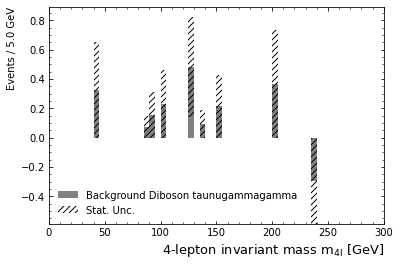

In [26]:
mc_x = ak.to_numpy(background_diboson["mass"]) # define list to hold the Monte Carlo histogram entries
mc_weights = ak.to_numpy(background_diboson["totalWeight"]) # define list to hold the Monte Carlo weights
mc_colors = samples['Background Diboson']['color'] # define list to hold the colors of the Monte Carlo bars
mc_labels = "Background Diboson taunugammagamma" # define list to hold the legend labels of the Monte Carlo bars

# *************
# Main plot 
# *************
main_axes = plt.gca() # get current axes

# plot the data points
# main_axes.errorbar(x=bin_centres, y=data_x, yerr=data_x_errors,
#                     fmt='ko', # 'k' means black and 'o' is for circles 
#                     label='Data') 

# plot the Monte Carlo bars
mc_heights = main_axes.hist(mc_x, bins=bin_edges, 
                            weights=mc_weights, stacked=True, 
                            color=mc_colors, label=mc_labels )
print(mc_x)
mc_x_tot = mc_heights[0] # stacked background MC y-axis value

# calculate MC statistical uncertainty: sqrt(sum w^2)
mc_x_err = np.sqrt(np.histogram(np.hstack(mc_x), bins=bin_edges, weights=np.hstack(mc_weights)**2)[0])

# plot the statistical uncertainty
main_axes.bar(bin_centres, # x
                2*mc_x_err, # heights
                alpha=0.5, # half transparency
                bottom=mc_x_tot-mc_x_err, color='none', 
                hatch="////", width=step_size, label='Stat. Unc.' )

# set the x-limit of the main axes
main_axes.set_xlim( left=xmin, right=xmax ) 

# separation of x axis minor ticks
main_axes.xaxis.set_minor_locator( AutoMinorLocator() ) 

# set the axis tick parameters for the main axes
main_axes.tick_params(which='both', # ticks on both x and y axes
                        direction='in', # Put ticks inside and outside the axes
                        top=True, # draw ticks on the top axis
                        right=True ) # draw ticks on right axis

# x-axis label
main_axes.set_xlabel(r'4-lepton invariant mass $\mathrm{m_{4l}}$ [GeV]',
                    fontsize=13, x=1, horizontalalignment='right' )

# write y-axis label for main axes
main_axes.set_ylabel('Events / '+str(step_size)+' GeV',
                        y=1, horizontalalignment='right') 

# set y-axis limits for main axes
# main_axes.set_ylim( bottom=0, top=np.amax(data_x)*1.6 )

# add minor ticks on y-axis for main axes
main_axes.yaxis.set_minor_locator( AutoMinorLocator() ) 

# draw the legend
main_axes.legend( frameon=False ); # no box around the legend

## Final Analysis

Now that we understand all the steps of our analysis,
    all that's left is to import the entire ATLAS data and implement it.
The `samples` dictionary will be useful for this.

We will loop over all values in the `samples` dictionary.
Depending on whether it is a data sample or MC sample, 
    `fileString` will change,
    which opens the correct file on the open data folder.
As before, 
    the selections, 
    mass calculations and MC weight calculations will be performed for each sample value,
    and then stored in the array.
The data will all be concatenated into `all_data` for plotting.

In [ ]:
fraction = 1
# Define empty dictionary to hold awkward arrays
all_data = {}

# Loop over samples
for s in samples:
    # Print which sample is being processed
    print('Processing '+s+' samples')

    # Define empty list to hold data for each sample
    frames = []

    # Loop over each file
    for val in samples[s]['list']:

        fileString = val # file name to open

        # start the clock
        start = time.time()

        # Open file
        tree = uproot.open(fileString + ":analysis")
        

        sample_data = []
        # Loop over data in the tree
        for data in tree.iterate(variables + weight_variables,
                                 library="ak",
                                 entry_stop=tree.num_entries*fraction): # process up to numevents*fraction
                                 #step_size = 1000000):

            padded_array = ak.pad_none(data['jet_pt'], 2)
            data['leading_jet_pt'] = padded_array[:, 0]
            data['subleading_jet_pt'] = padded_array[:, 1]
            padded_array = ak.pad_none(data['jet_eta'], 2)
            data['leading_jet_eta'] = padded_array[:, 0]
            data['subleading_jet_eta'] = padded_array[:, 1]

            # Event Selection (reference: https://arxiv.org/pdf/1409.6212)

            # Generate btag identifier
            data['btag_ID'] = (data['jet_btag_quantile'] >= 4)

            data = data[data['trigMET']] # Apply MET trigger 
            data = data[data['met'] > 150 * GeV] # MET>30 GeV 
            
            data = data[selectJets(data)]
            data = data[selectZeroLeptons(data)]
            
            data = data[select_HT(data)]
            data = data[select_2b_phi(data)]
            data = data[select_metbb_phi(data)]
            data = data[select_min_metjets_phi(data)]

            # Invariant Mass
            data['mass'] = calc_mass(data)

            # Store Monte Carlo weights in the data
            if 'Data' not in s: # Only calculates weights if the data is MC
                #print(f'weight: {sumweights}')
                if s=='Signal':
                    data['totalWeight'] = calc_weight(data)
                else:
                    data['totalWeight'] = calc_weight(data)
                print(data['totalWeight'])  
            elapsed = time.time() - start # time taken to process
            print("\t"+str(len(data)) + " events in "+str(round(elapsed,1))+"s") # events before and after

            # Append data to the whole sample data list
            sample_data.append(data)

        frames.append(ak.concatenate(sample_data))

    all_data[s] = ak.concatenate(frames) # dictionary entry is concatenated awkward arrays

/tmp/ipykernel_1754322/2660167152.py:150: RuntimeWarning: invalid value encountered in divide
  ratio_uncertainty = ratio * np.sqrt((data_x_errors/this_data_x)**2 + (mc_x_err/(mc_x_tot + signal_x_tot))**2)
/tmp/ipykernel_1754322/2660167152.py:166: RuntimeWarning: invalid value encountered in divide
  ax2.fill_between(bin_left, 1 - mc_x_err/mc_x_tot, 1 + mc_x_err/mc_x_tot,


<Figure size 1332x756 with 0 Axes>

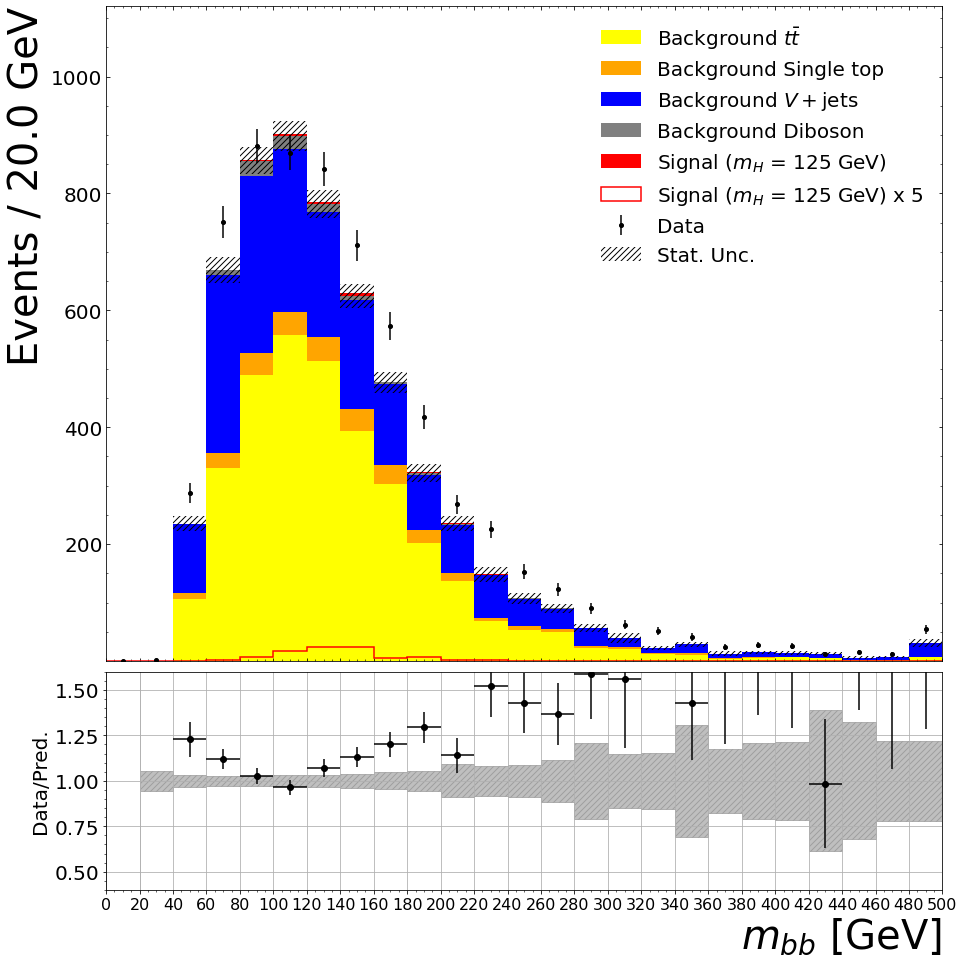

In [28]:
# Variable to plot. 
# Set to either "mass" (for invariant mass of two b-jets) or 
# "met" for the missing transverse energy
variable_to_plot = 'mass'
# x-axis range of the plot
if variable_to_plot == "met":
    step_size = 25* GeV
    xmin = 150 * GeV
    xmax = 500 * GeV
else:
    step_size = 20* GeV
    xmin = 0 * GeV
    xmax = 500 * GeV


bin_edges = np.arange(start=xmin, # The interval includes this value
                    stop=xmax+step_size, # The interval doesn't include this value
                    step=step_size ) # Spacing between values
bin_centres = np.arange(start=xmin+step_size/2, # The interval includes this value
                        stop=xmax+step_size/2, # The interval doesn't include this value
                        step=step_size ) # Spacing between values

bin_left = np.arange(start=xmin, # The interval includes this value
                        stop=xmax+step_size, # The interval doesn't include this value
                        step=step_size ) # Spacing between values

data_x,_ = np.histogram(np.clip(ak.to_numpy(all_data['Data'][variable_to_plot]),bin_edges[0],bin_edges[-2]),
                        bins=bin_edges ) # histogram the data
data_x_errors = np.sqrt( data_x ) # statistical error on the data

signal_x = np.clip(ak.to_numpy(all_data['Signal'][variable_to_plot]),bin_edges[0],bin_edges[-2]) # histogram the signal
signal_weights = ak.to_numpy(all_data['Signal'].totalWeight) # get the weights of the signal events
signal_color = samples['Signal']['color'] # get the colour for the signal bar

mc_x = [] # define list to hold the Monte Carlo histogram entries
mc_weights = [] # define list to hold the Monte Carlo weights
mc_colors = [] # define list to hold the colors of the Monte Carlo bars
mc_labels = [] # define list to hold the legend labels of the Monte Carlo bars

for s in samples: # loop over samples
    if s not in ['Data', 'Signal']: # if not data nor signal
        # if 'V' in s or 'bar' in s:
        #     print(f'skip {s}')
        #     break
        mc_x.append( np.clip(ak.to_numpy(all_data[s][variable_to_plot]),bin_edges[0],bin_edges[-2]) ) # append to the list of Monte Carlo histogram entries
        mc_weights.append( ak.to_numpy(all_data[s].totalWeight) ) # append to the list of Monte Carlo weights
        mc_colors.append( samples[s]['color'] ) # append to the list of Monte Carlo bar colors
        mc_labels.append( s ) # append to the list of Monte Carlo legend labels

# *************
# Main plot
# *************
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

# Create a 2-row grid layout
fig, (main_axes, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(8, 6),
                               gridspec_kw={'height_ratios': [3, 1]})
fig.set_size_inches(13.5, 13.5)
#main_axes = plt.gca() # get current axes

# plot the data points
main_axes.errorbar(x=bin_centres, y=data_x, yerr=data_x_errors,
                   fmt='ko', # 'k' means black and 'o' is for circles
                   markersize=4, # Adjust the size of the circles
                   label='Data')

# # plot the Monte Carlo bars
mc_heights = main_axes.hist(mc_x, bins=bin_edges,
                            weights=mc_weights, stacked=True,
                            color=mc_colors,
                            label=mc_labels )

mc_x_tot = mc_heights[0][-1] # stacked background MC y-axis value

# calculate MC statistical uncertainty: sqrt(sum w^2)
mc_x_err = np.sqrt(np.histogram(np.hstack(mc_x), bins=bin_edges, weights=np.hstack(mc_weights)**2)[0])

# plot the signal bar
signal_heights = main_axes.hist(signal_x, bins=bin_edges, bottom=mc_x_tot,
                    weights=signal_weights, color=signal_color,
                    label=r'Signal ($m_H$ = 125 GeV)')

signal_x_tot = signal_heights[0]# stacked background MC y-axis value

# plot the statistical uncertainty
main_axes.bar(bin_centres, # x
                2*mc_x_err, # heights
                alpha=0.5, # half transparency
                bottom=mc_x_tot-mc_x_err, color='none',
                hatch="////", width=step_size, label='Stat. Unc.' )

# plot the signal bar
main_axes.hist(signal_x, bins=bin_edges, #bottom=mc_x_tot,
                weights=signal_weights*(10 if variable_to_plot == "met" else 5), color=signal_color, histtype='step', linewidth=1.5, 
                label=r'Signal ($m_H$ = 125 GeV) x %i'%(10 if variable_to_plot == "met" else 5))

if variable_to_plot == "met":
    ax2.tick_params(axis='y', labelsize=20)
    main_axes.set_xticks(list(np.arange(0, 550, step=25)), list(np.arange(0, 550, step=25)))  # Set text labels and properties.
    ax2.set_xticks(list(np.arange(0, 550, step=25)), list(np.arange(0, 550, step=25)),fontsize=20)  # Set text labels and properties.
else:
    main_axes.set_xticks(list(np.arange(0, 520, step=20)), list(np.arange(0, 520, step=20)))  # Set text labels and properties.
    ax2.set_xticks(list(np.arange(0, 520, step=20)), list(np.arange(0, 520, step=20)),fontsize=16)  # Set text labels and properties.
    ax2.tick_params(axis='y', labelsize=20)
main_axes.tick_params(axis='y', labelsize=20)

# set the x-limit of the main axes
main_axes.set_xlim( left=xmin, right=xmax )

# separation of x axis minor ticks
main_axes.xaxis.set_minor_locator( AutoMinorLocator() )

# set the axis tick parameters for the main axes
main_axes.tick_params(which='both', # ticks on both x and y axes
                        direction='in', # Put ticks inside and outside the axes
                        top=True, # draw ticks on the top axis
                        right=True ) # draw ticks on right axis


# write y-axis label for main axes
main_axes.set_ylabel('Events / '+str(step_size)+' GeV',
                        y=1, horizontalalignment='right',fontsize=40)



# add minor ticks on y-axis for main axes
main_axes.yaxis.set_minor_locator( AutoMinorLocator() )

if variable_to_plot == "met":
    xtit = r'$E_{T}^{miss}$ [GeV]'
    main_axes.set_yscale('log')
    # set y-axis limits for main axes
    main_axes.set_ylim( bottom=0.4, top=350000)#np.amax(data_x)*1.6 )
else:
    xtit = r'$m_{bb}$ [GeV]'
    #main_axes.set_yscale('log')
    main_axes.set_ylim( bottom=0.1, top=1120)#np.amax(data_x)*1.6 )
    ax2.set_ylim( bottom=0.45, top=4.5)#np.amax(data_x)*1.6 )
# draw the legend
main_axes.legend( frameon=False, fontsize=20 ); # no box around the legend


# Calculate the ratio where counts2 is not zero
this_data_x = data_x.astype('float64')
ratio = np.divide(this_data_x , (mc_x_tot + signal_x_tot), out=np.zeros_like(this_data_x), where=(mc_x_tot != 0))


# Calculate uncertainty in the ratio using propagation of uncertainty
ratio_uncertainty = ratio * np.sqrt((data_x_errors/this_data_x)**2 + (mc_x_err/(mc_x_tot + signal_x_tot))**2)


ratio_uncertainty[ratio_uncertainty < 0] = 0      # Replace negative numbers with 0
ratio_uncertainty[np.isnan(ratio_uncertainty)] = 0  # Replace NaN with 0

# Plot the ratio with markers in the bottom subplot
mid_bins = 0.5 * (bin_edges[:-1] + bin_edges[1:])  # Midpoints of bins for plotting
bin_widths = np.diff(bin_edges) / 2  # Half bin width for each midpoint

# To get the edges right need to add an additional point to the right of the axis limits
mc_x_err = np.append(mc_x_err,mc_x_err[-1])
mc_x_tot = np.append(mc_x_tot,mc_x_tot[-1])

uncertainty = 0.1
# Add a shaded area representing the error around ratio = 1
ax2.fill_between(bin_left, 1 - mc_x_err/mc_x_tot, 1 + mc_x_err/mc_x_tot, 
                 hatch="////",color='gray', alpha=0.5, label='Error Band', step = 'pre')

ax2.errorbar(mid_bins, ratio, xerr=bin_widths ,yerr=ratio_uncertainty,fmt="o", color='black')
#ax2.plot(mid_bins, ratio, marker='o', linestyle='None', color='black')  # 'o' is the marker style
ax2.set_xlabel(xtit ,fontsize=40,loc='right')
ax2.set_ylabel('Data/Pred.',fontsize=20)
ax2.set_ylim( bottom=0.4, top=1.6)#np.amax(data_x)*1.6 )
ax2.grid(True)  # Enable gridlines for the bottom subplot

# add minor ticks on y-axis for main axes
ax2.yaxis.set_minor_locator( AutoMinorLocator() )

# Adjust layout
plt.tight_layout()